Importing Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


Loading Dataset

In [6]:
df = pd.read_csv("HeartDiseaseTrain-Test.csv")

Data Cleaning

In [7]:
print(df.isnull().sum()) # Check for missing values
# The Heart UCI dataset is not null but for our satisfaction we are
# Checking

df.info() # Information about datatypes
df.head()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral              

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


Data Preprocessing as it contains Strings values

In [25]:
# Detect String/Object Columns
object_cols = df.select_dtypes(include='object').columns.tolist()
print("Object Columns are: ", object_cols)

# Now finding how much unique values are there in each column
# Important to choose if we want binary encoding or one hot encoding

for col in object_cols:
  print(f"{col}: {df[col].unique()}")

Object Columns are:  []


In [30]:
#After the output we know there are only three columns for binary encoding
# 1. Sex      2. exercise_induced_angina      3.fasting_blood_sugar

#Binary Encoding for these
from sklearn.preprocessing import LabelEncoder
# In Sex Column (Male = 1, Female = 0)
# In fasting_blood_sugar (Lower than 120 mg/ml = 1, Greater than 120 mg/ml = 0)
# In exercise_induced_angina (No = 0, Yes = 1)
le = LabelEncoder()
binary_cols = [col for col in object_cols if df[col].nunique() == 2]
for col in binary_cols:
  df[col] = le.fit_transform(df[col])

# One-Hot Encoding for Multiclass columns
# This will divide columns to ensure only true false values
multi_cols = [col for col in object_cols if df[col].nunique() > 2]
df= pd.get_dummies(df, columns = multi_cols, drop_first = True)

# Change back to 1 and 0 (1 is True, 0 is False)
bool_cols = df.select_dtypes(include ='bool').columns.tolist()
le = LabelEncoder()
binary_cols = [col for col in bool_cols if df[col].nunique() == 2]
for col in binary_cols:
  df[col] = le.fit_transform(df[col])


df.head() # to see changes

,age,sex,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,exercise_induced_angina,oldpeak,target,chest_pain_type_Atypical angina,...,rest_ecg_ST-T wave abnormality,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,1,125,212,1,168,0,1.0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,53,1,140,203,0,155,1,3.1,0,0,...,0,0,1,0,0,0,1,0,0,1
2,70,1,145,174,1,125,1,2.6,0,0,...,1,0,1,0,0,0,1,0,0,1
3,61,1,148,203,1,161,0,0.0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,62,0,138,294,0,106,0,1.9,0,0,...,1,1,0,0,1,0,0,0,0,0


Exploratory Data Analysis

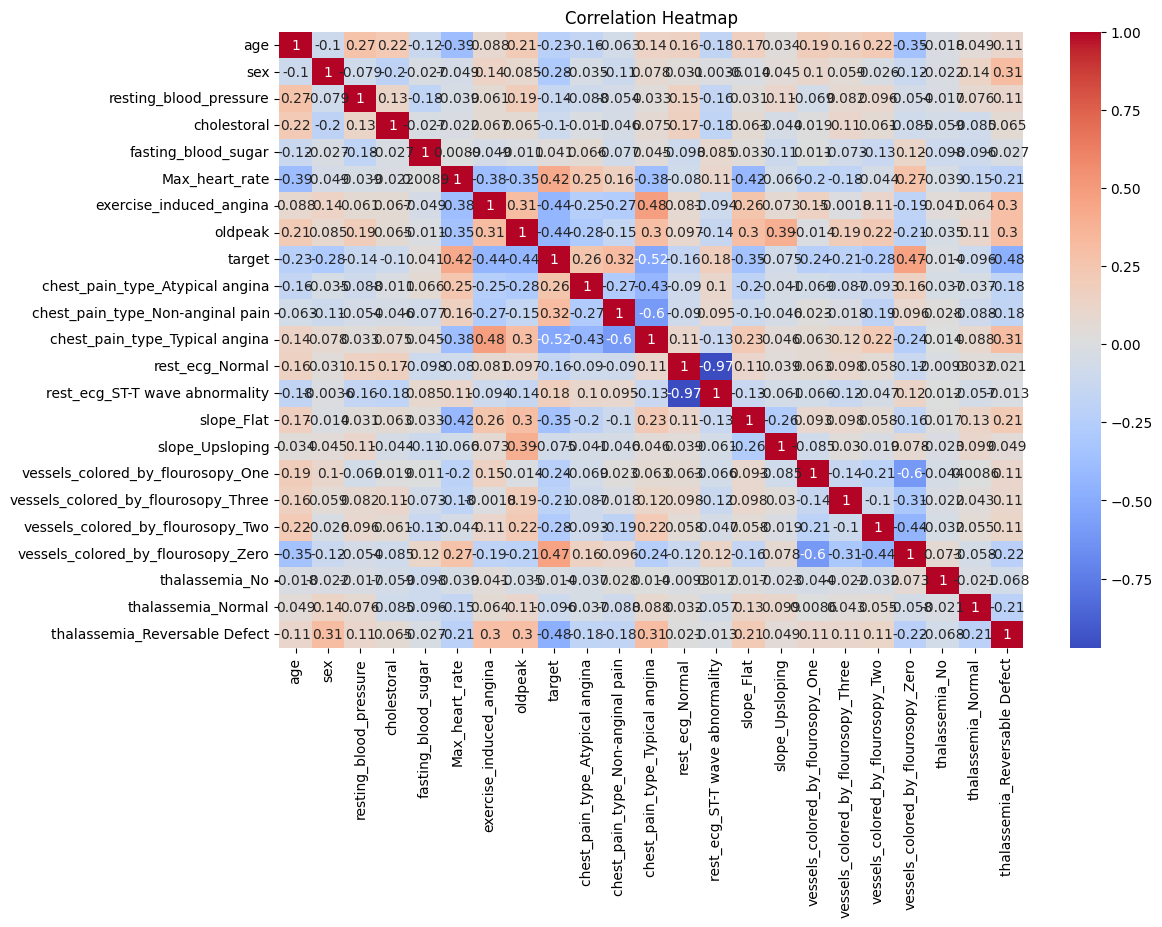

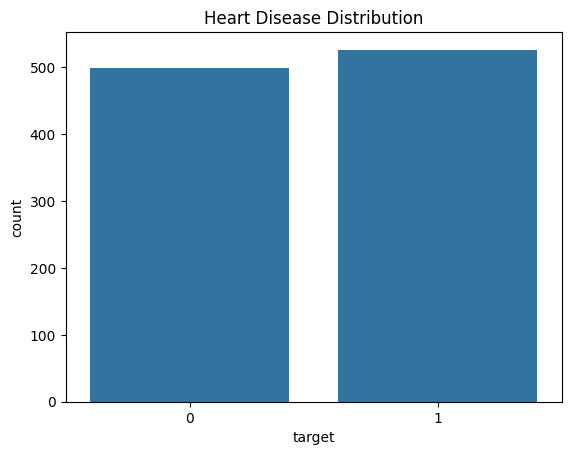

In [31]:
df.describe() # For basic stats

# Correlation heatmap

plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Countplot of target classes

sns.countplot(data = df, x = 'target')
plt.title("Heart Disease Distribution")
plt.show()

Feature and Target Setup

In [33]:
X = df.drop('target', axis = 1)
y = df['target']

#Train and test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

Best Step Model Training

In [34]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation

Accuracy:  0.8146341463414634


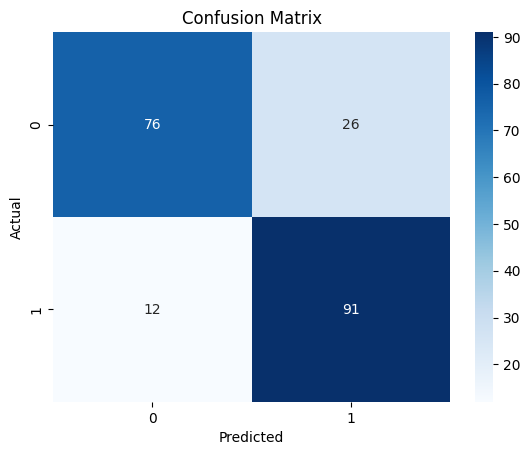

In [40]:
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))

# COnfusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Visualization with ROC Curve

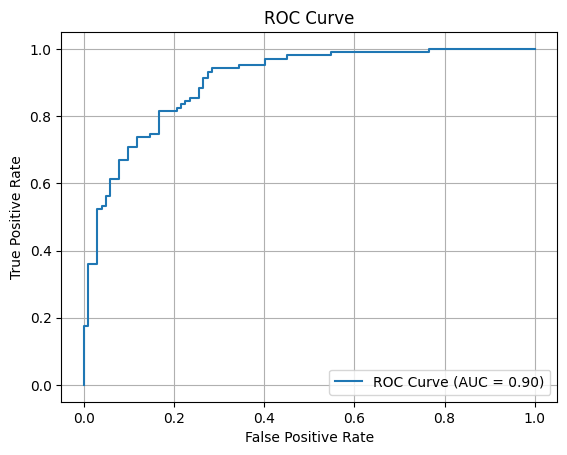

In [41]:
y_prob = lr_model.predict_proba(X_test)[: , 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label= f"ROC Curve (AUC = {roc_auc_score(y_test,y_prob):.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

Feature Importance

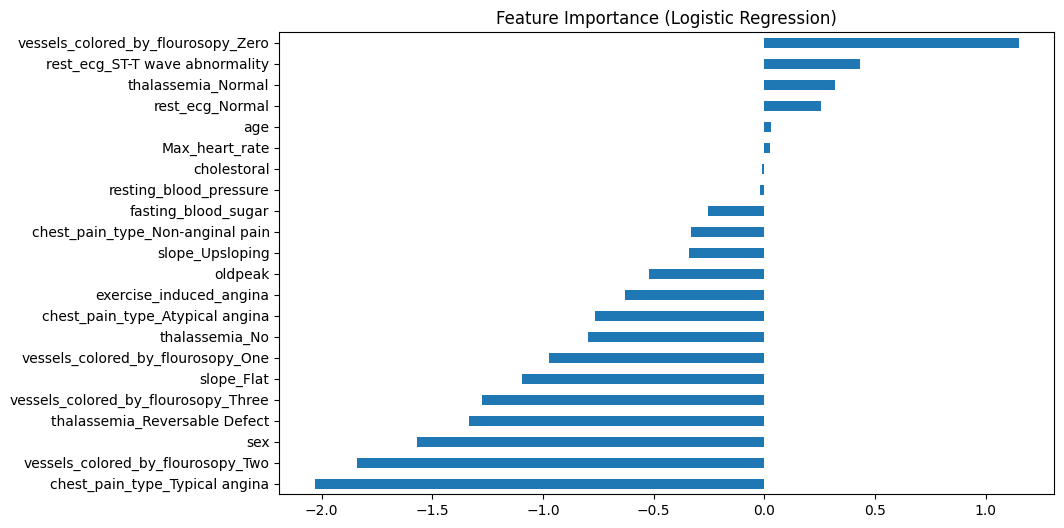

In [43]:
importance = pd.Series(lr_model.coef_[0], index=X.columns).sort_values()
importance.plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance (Logistic Regression)")
plt.show()
